In [1]:
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [29]:
from sklearn.datasets import load_wine

# Load the Wine dataset
wine_data = load_wine()

# Wine dataset is stored in a dictionary-like object
X = wine_data.data  # Features (data)
y = wine_data.target  # Labels (target classes)

In [4]:
data = pd.DataFrame(pd.read_csv('wine/wine.data', header=None))
columns = [
    'class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
    'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
    'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'
]

data.columns = columns
data.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [41]:
from sklearn.preprocessing import MinMaxScaler as ms

scaler = ms()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.        , 0.84210526, 0.1916996 , ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.        , 0.57105263, 0.2055336 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.        , 0.56052632, 0.3201581 , ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [1.        , 0.58947368, 0.69960474, ..., 0.08943089, 0.10622711,
        0.39728959],
       [1.        , 0.56315789, 0.36561265, ..., 0.09756098, 0.12820513,
        0.40085592],
       [1.        , 0.81578947, 0.66403162, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [42]:
lda = LDA(n_components=min(2, len(data.columns)))
lda_result = lda.fit_transform(scaled_data, data['class'])

In [43]:
lda_result.shape

(178, 2)

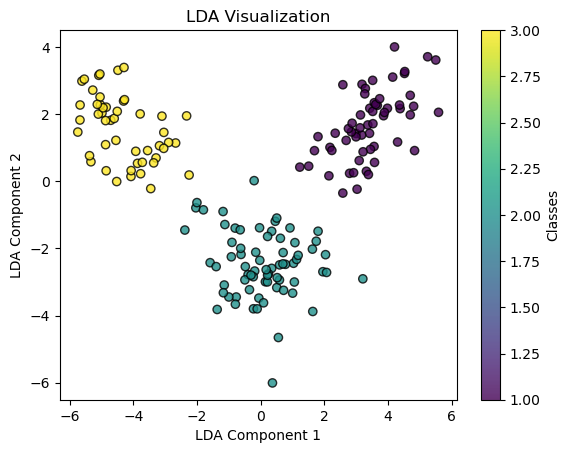

In [45]:
import matplotlib.pyplot as plt

plt.scatter(lda_result[:, 0], lda_result[:, 1], c=data['class'], cmap='viridis', alpha=0.8, edgecolors='k')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Visualization')
plt.colorbar(label='Classes')
plt.show()


In [47]:
X = lda_result
y = data['class']

In [48]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [51]:
from sklearn.svm import SVC

svm = SVC()

In [55]:
svm_pred = svm.fit(X_train, y_train)

In [56]:
s = svm.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, s)

1.0

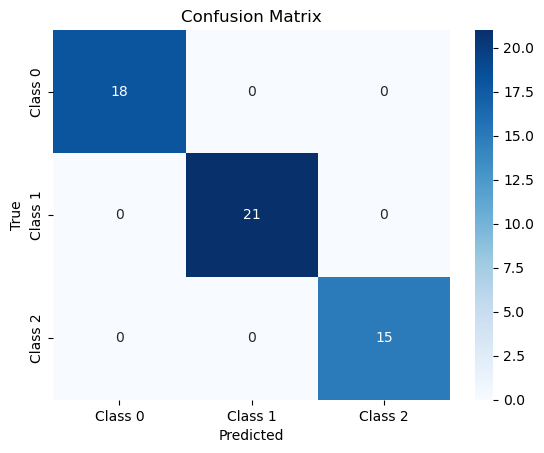

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, s)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
